In [7]:
import sys
sys.path.insert(0,'../scripts/')
import dndTools
import heth
import timos
from matplotlib import pyplot as plt
import numpy as np

In [182]:
class purchase_power:
    def __init__(self, percentage_at_price_point):
        """
        percentage_at_at_price_point should be a list where values are the percentage (as a value between 0 and 1)
        of people who can afford a price equal to 10 to the power of the index value.
        
        e.g a list [0.9,0.5,0.3,0.1] corresponds to 90% of people affording 1gp, 50% affording 10gp, 30% 100gp,
        10% 1000gp
        """
        percentage_afford = []
        price = []
        
        for i,percentage in enumerate(percentage_at_price_point):
            #I've hacked this to do it quickly
            if (i==0):
                price += np.linspace(0,10**i,2).tolist()
                percentage_afford += np.linspace(1,percentage,2).tolist() 
            else:
                price += np.linspace(10**(i-1),10**i,2).tolist()
                percentage_afford += np.linspace(percentage_at_price_point[i-1],percentage,2).tolist()
            
        self.model = np.poly1d(np.polyfit(price,percentage_afford,1)) 
    
    def __call__(self,price):
        percentage_afford = self.model(price)
        
        if (percentage_afford > 1): percentage_afford = 1
        if (percentage_afford < 0): percentage_afford = 0
    
        return percentage_afford 

        

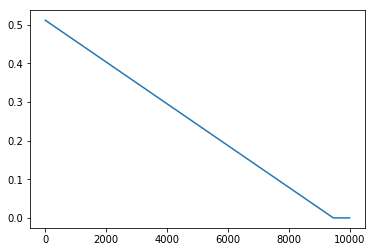

In [183]:
hethport = purchase_power([0.9,0.6,0.1,0.1,0.05])

vals = []
for i in range (0,10000):
    vals.append(hethport(i))
plt.plot(vals)

In [101]:
price = 3000

In [90]:
np.log10(0)

/home/will/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf